In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.compat import lzip
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import kstest
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\\Study\\Excelr DS\\Assignments\\AS-5-MLR\\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df1 = df.copy()

In [6]:
df1 = pd.get_dummies(df1,columns=["State"])
df1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [7]:
x1 = df1["R&D Spend"]
x2 = df1["Administration"] 
x3 = df1["Marketing Spend"]
x4 = df1["State_California"]
x5 = df1["State_Florida"]
x6 = df1["State_New York"]
y1 = df1["Profit"]

In [8]:
# Defining a dictionary specifying various models
params = {"No Transformation" : {"x1" : x1, "x2" : x2, "x3" : x3 , "x4" : x4, "x5" : x5, "x6" : x6 ,"y" : y1},
          "Square-Root-Tran-X-Y" : {"x1" : np.sqrt(x1), "x2" : np.sqrt(x2), "x3" :np.sqrt(x3), "x4" :np.sqrt(x4),"x5" :np.sqrt(x5) , "x6" :np.sqrt(x6) ,"y" : np.sqrt(y1)},
          "SquareRoot-Tran(X)" : {"x1" : np.sqrt(x1), "x2" : np.sqrt(x2), "x3" :np.sqrt(x3), "x4" :np.sqrt(x4),"x5" :np.sqrt(x5) , "x6" :np.sqrt(x6), "y" : y1},
          "SquareRoot-Tran(Y)" : {"x1" : x1, "x2" : x2, "x3" : x3, "x4" : x4, "x5" : x5, "x6" : x6, "y" : np.sqrt(y1)}}

In [9]:
# Creating the models
R_square1=[] # Empty list for storing the R Square of all the models
R_square_Adj1 = [] # Empty list for storing the Adjusted R Square of all the models
MSE1 = [] # Empty list for storing the MSE of all the models

for key, val in params.items():
    print('\033[1m' + '\033[4m' + key,":" + '\033[0m',"\n\n") #model name
    x1 = val['x1']
    x2 = val['x2'] 
    x3 = val['x3']
    x4 = val['x4']
    x5 = val['x5']
    x6 = val['x6']
    y1 = val['y']
    
    model1 = smf.ols('y1~x1+x2+x3+x4+x5+x6', data=df1).fit() #model fitting
    print(model1.summary(),"\n\n")
    

    R_square1.append(model1.rsquared)
    R_square_Adj1.append(model1.rsquared_adj)
    MSE1.append(model1.mse_model)

No Transformation : 


                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           1.34e-27
Time:                        00:29:22   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.763e+04   5073.

In [10]:
# Printing the results from all the models
Models1 = params.keys()
joined1 = list(zip(Models1, R_square1, R_square_Adj1, MSE1))
Results1 = pd.DataFrame(joined1, columns=['Models', 'R-Square', 'Adjusted R-Square','MSE'])
Results1

,Models,R-Square,Adjusted R-Square,MSE
0,No Transformation,0.950752,0.945156,1.513690e+10
1,Square-Root-Tran-X-Y,0.931286,0.923478,3.841633e+04
2,SquareRoot-Tran(X),0.908514,0.898117,1.446441e+10
3,SquareRoot-Tran(Y),0.896162,0.884362,3.696743e+04


We shall use the model with no transformation as it has high value of R-squared and Adjusted R-squared.

In [11]:
model1 = smf.ols('y1~x1+x2+x3+x4+x5+x6', data=df1).fit() #model fitting
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     75.95
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           1.65e-20
Time:                        00:29:22   Log-Likelihood:                -222.44
No. Observations:                  50   AIC:                             456.9
Df Residuals:                      44   BIC:                             468.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    170.8597     11.859     14.408      0.0

## Hypothesis Testing:

### 1. Significancy of the regression coefficients

#### Hypothesis:
H0 : The regression coefficients are insignificant

H1 : The regression coefficients are significant

In [12]:
model1.pvalues

Intercept    2.872264e-18
x1           6.623820e-15
x2           9.975345e-01
x3           3.250586e-01
x4           2.845173e-12
x5           6.697235e-12
x6           1.071277e-12
dtype: float64

#### Conclusion:
The p-value for x2 and x3 are more than 0.05, hence, we do not reject H0 for these variables and conclude that these regression coefficients are insignificant.

The p-value for all other variables are less than 0.05, hence we reject H0 for these variables and conclude that these regression coefficients are significant.

### 2. Significancy of the model :

H0 : The model is insignificant

H1 : The model is significant

In [13]:
model1.f_pvalue

1.650514858995205e-20

#### Conclusion:
The p-value for the F-test to check the significancy of the model is less than 0.05, hence we reject H0 and conclude that the model is significant.

## Validating the Assumptions of the linear model

### 1. Linearity

Indiviadual Comparison 




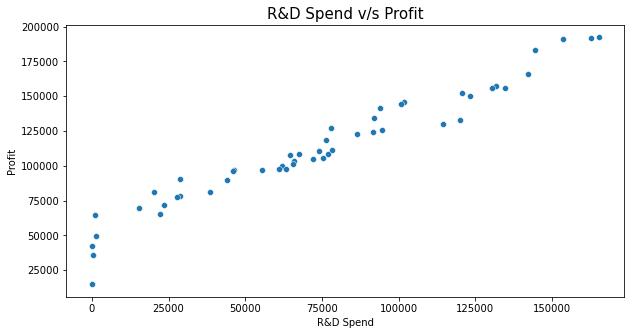

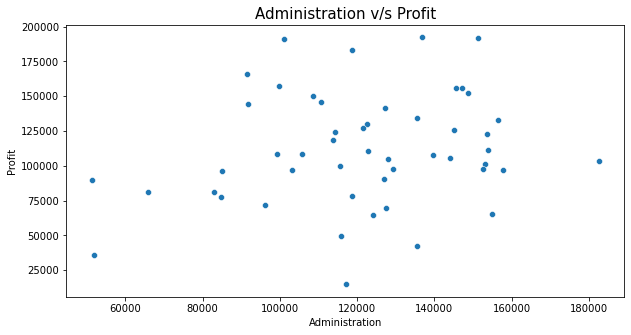

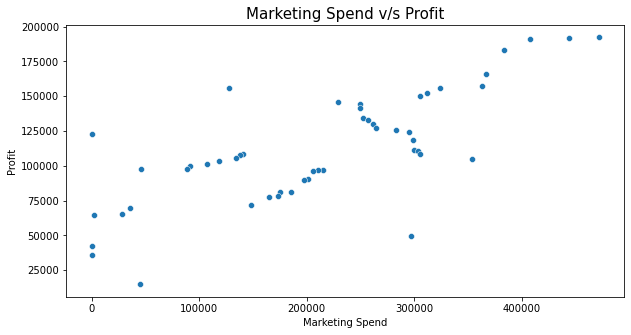

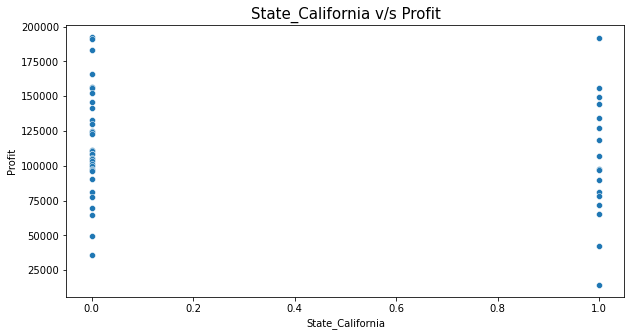

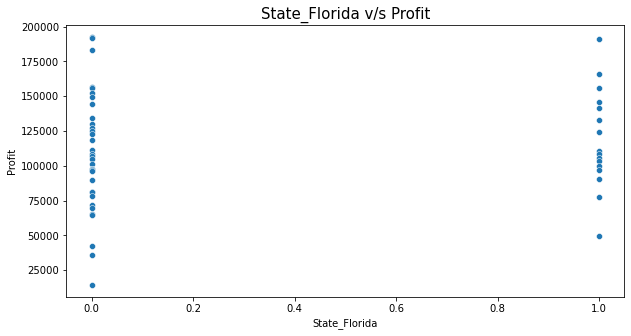

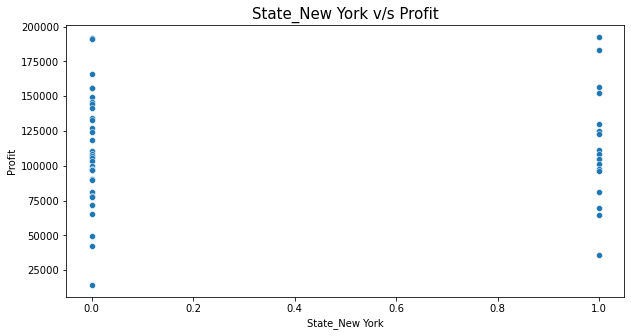

In [14]:
names = df1.drop(['Profit'], axis=1).columns
print("Indiviadual Comparison \n\n")
for i in names:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=df1, x=i, y="Profit")
    plt.title(label=f'{i} v/s Profit', size=15)
    plt.show()

#### Conclusion:
1. For R&D spend and profit, from the graph, we can say that there exist a linear realtionship between them.
2. For Administration and profit, from the graph, we cannot say that there exist a perfect linear realtionship between them.
3. For Marketing spend and profit, from the graph, we can say that there exist a kind-of linear realtionship between them.

### 2. Testing Multicollinearity

#### Using Pair plot

We shall see if there is correlation between the variables, by using pairplot.

In [15]:
# We shall remove the output variable
data = df1.drop(["Profit"], axis=1)

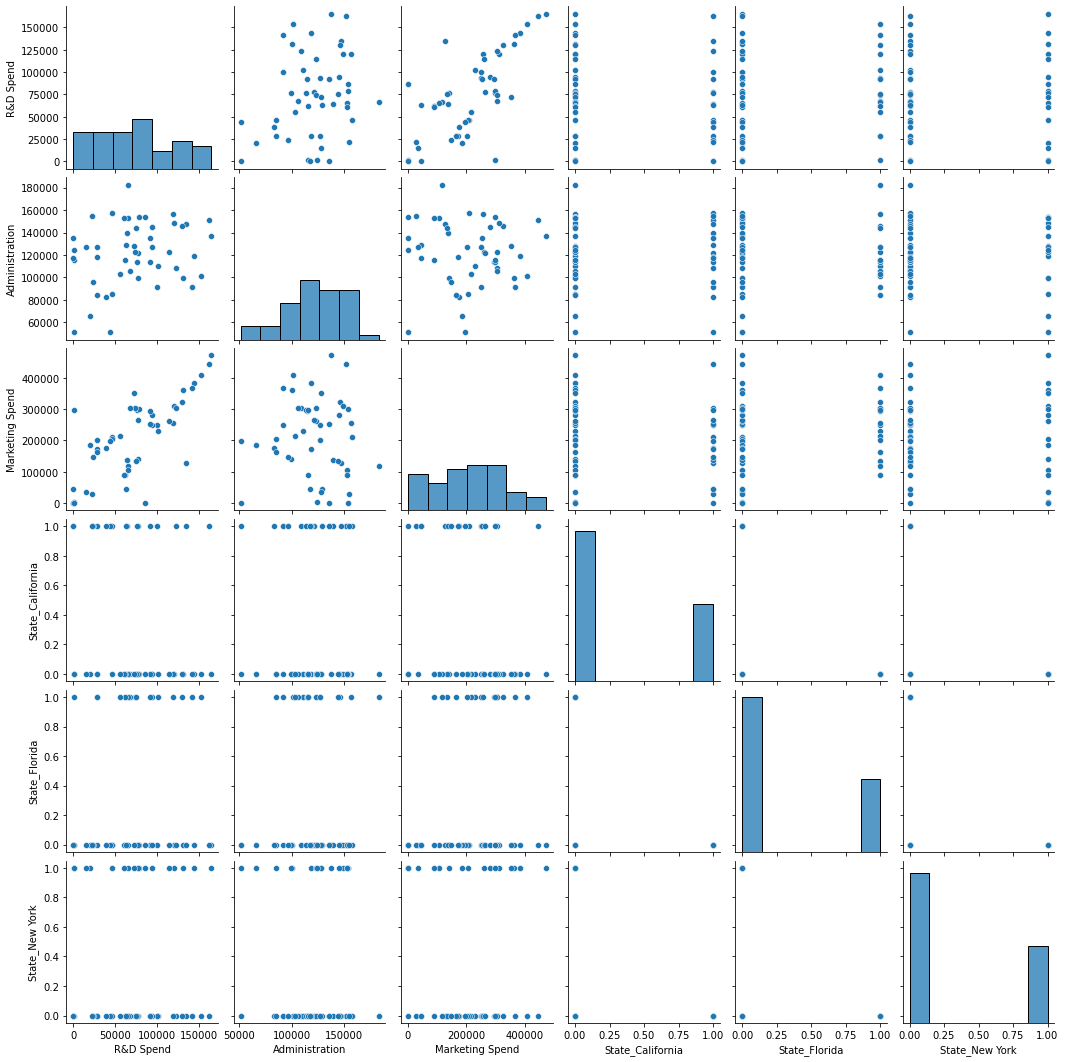

In [16]:
sns.pairplot(data = data)  

The visualiztion shows that there is little to no correlation between the explanatory variables, but we can also test it by finding the correlations between the variables.

#### Using Correlation

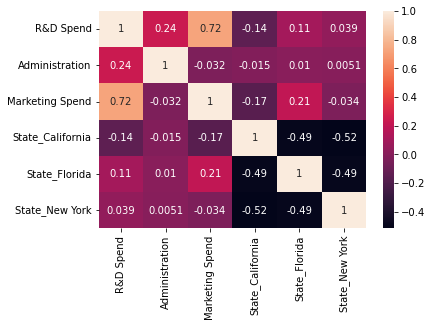

In [17]:
sns.heatmap(data.corr(), annot=True)
plt.show()

The R&D spend and Administration gives us a hint of possible collinearity, but to validate the results we shall use VIF.

#### Using Variance Inflation Factor

In [18]:
X = df1[['R&D Spend','Administration', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values('VIF Factor',ascending=False)

,VIF Factor,features
4,9.443578,State_Florida
5,9.222969,State_New York
3,9.044052,State_California
0,2.495511,R&D Spend
2,2.416797,Marketing Spend
1,1.177766,Administration


#### Conclusion:
Here all the values of VIF are less than 10, hence we shall conclude that all the explanatory variables are independent and there exists no multicollinearity.

### 3. Normality of the errors

#### Using Q-Q Plot

We shall use the Q-Q plot to check if the error terms follow normal distribution or not.

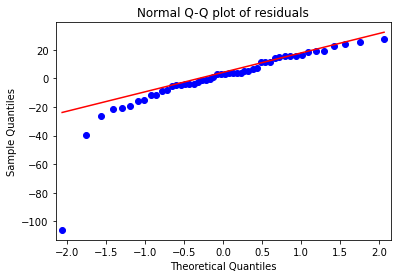

In [19]:
qqplot=sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

Here, majority of the data points lie near the line, and hence we can conclude that the errors follow normal distribution. But to validate our result, we shall use Shapiro-Wilk Test to check the normality of the errors.

#### Performing Kolmogrov-Smirnov Test

##### Hypothesis :

H0 : Error terms are distributed normally

H1 : Error terms are not distributed normally

In [20]:
#for large dataset
# from scipy.stats import shapiro
# shapiro(model1.resid)

In [21]:
kstest(model1.resid, 'norm')

KstestResult(statistic=0.5392279574733101, pvalue=3.926721744504454e-14)

#### Conclusion:
The p-value is less than 0.05, hence reject H0 and conclude that the error terms are not distributed normally.

### 4. Testing Homoscedasticity

#### Using Predicted v/s Residual Plot

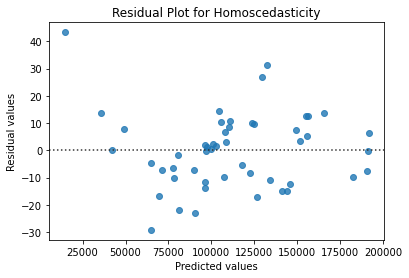

In [22]:
preds = model1.fittedvalues.copy()
true = df1["Profit"].values.copy()
resid = true-preds
sns.residplot(resid,preds)
plt.title('Residual Plot for Homoscedasticity')
plt.xlabel('Predicted values')
plt.ylabel('Residual values')
plt.show()

Here the distribution seems to be random, and hence we can say that there exist homoscedasticity, but to validate our result, we shall use Breush-Pagan Test.

#### Using Breush-Pagan Test 

##### Hypothesis :

H0 : Homoscedasticity is present

H1 : Homoscedasticity is not present

In [23]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
test_result = sms.het_breuschpagan(model1.resid, model1.model.exog)
lzip(names, test_result)

[('Lagrange multiplier statistic', 5.103578760657373),
 ('p-value', 0.5305987611246707),
 ('f-value', 1.000335702802723),
 ('f p-value', 0.4287994181233886)]

##### Conclusion :
The p-value for lm test is 0.5305, i.e. more than 0.05, hence, we do not reject H0, and conclude that homoscedasticity is present.

### 5. Testing Autocorrelation

#### Using residual plot

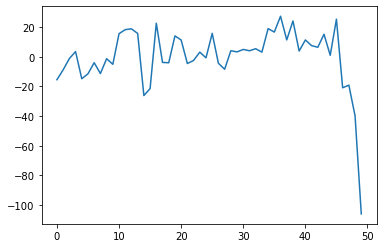

In [24]:
plt.plot(model1.resid.index, model1.resid)

The plot shows that the data points are spread randomly, but some datapoints are concentrated, hence we are not able to conclude anything. Hence we shall use ACF and PACF plots

#### Using ACF and PACF plot

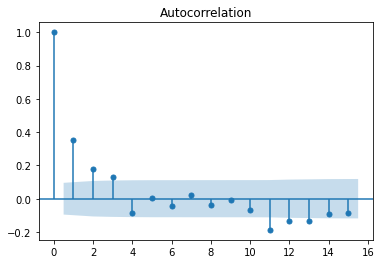

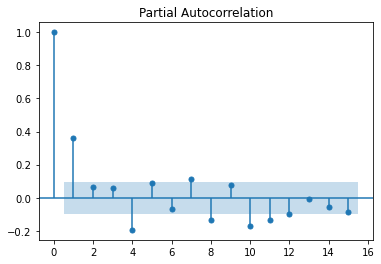

In [25]:
acf = smt.graphics.plot_acf(model1.resid, lags=15, alpha=0.5)
acf.show()
pacf = smt.graphics.plot_pacf(model1.resid, lags=15, alpha=0.5)
pacf.show()

Here, the graph indicates that there exist autocorrelation, because, some points are outside the level of significance. But to validate our result, we shall use Durbin-Watson test.

#### Performing Durbin-Watson Test

The value of test statistic :
* Between 2 and 4 : No autocorrelation
* Less than 2 : Positive Autocorrelarion
* More than 4 : Negative Autocorrelation

##### Hypothesis
H0 : There is no autocorrelation

H1 : There is autocorrelation

In [26]:
durbin_watson(model1.resid)

0.7555791542404793

#### Conclusion:
The value of test statistic is less than 2, hence it can be concluded that there exist positive correlation between the error terms.

In [27]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance
print(c)

[1.73297869e-02 6.47022413e-03 8.04102771e-05 5.36551738e-04
 1.29366785e-02 5.72995150e-03 1.56043212e-03 4.28624633e-03
 5.54323659e-05 9.79010355e-04 7.76844498e-03 1.34325761e-02
 7.91385396e-03 6.12986166e-03 2.64024478e-02 1.19122851e-02
 1.24105423e-02 4.32841482e-04 3.61802482e-04 2.00060152e-02
 3.94901088e-03 1.07825182e-03 1.60953627e-04 3.00329886e-04
 1.56687757e-05 6.05454266e-03 6.81443306e-04 4.15948552e-03
 1.33489851e-03 3.94086276e-04 1.10249175e-03 6.32805495e-04
 1.26962502e-03 2.60074148e-04 1.99522737e-02 9.96205884e-03
 2.98985116e-02 1.06947410e-02 3.80318748e-02 5.42064054e-04
 3.83365482e-03 2.44264948e-03 1.28115315e-03 9.14674424e-03
 5.28055469e-05 3.18811206e-02 6.29595177e-02 1.67964605e-02
 2.15627774e-01 4.14903419e-01]


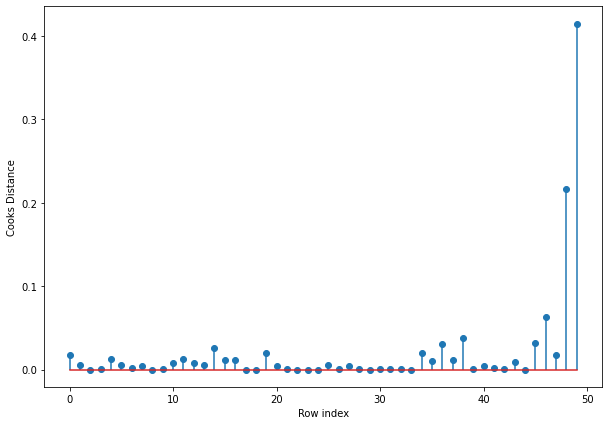

In [28]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(10, 7))
plt.stem(np.arange(len(df1)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [29]:
k = df1.shape[1] # columns
n = df1.shape[0] # rows
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.48

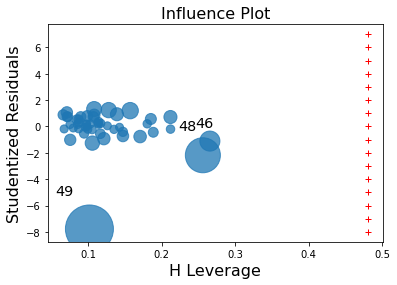

In [30]:
influence_plot(model1,alhpa=0.5)

y=[i for i in range(-8,8)]
x=[leverage_cutoff for i in range(16)]
plt.plot(x,y,'r+')

plt.show()

Here, all the values are lying inside the line of significancy, which indicates that there are no datapoints, in the datasets that are acting as outliers.